In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

## Load Data

In [3]:
epoch_key = ('jaq', 1, 2) # animal, day, epoch

In [4]:
from src.load_data import load_data

data = load_data(epoch_key)

INFO:src.load_data:Loading position information and linearizing...
INFO:src.load_data:Loading multiunits...


Data is a dictionary with two keys: `position_info` and `multiunits`.

Position info has 1D and 2D position data as well as head direction and speed. Multiunits has the marks.

These are both interpolated to/binned at 500 Hz.

In [5]:
data['position_info']

,x_position,y_position,head_direction,speed,linear_distance,track_segment_id,linear_position,linear_velocity,linear_speed
time,,,,,,,,,
00:43:30.546587,28.574616,50.447565,-0.524582,27.167580,55.166435,0.0,228.300285,0.041720,0.041720
00:43:30.548587,28.620635,50.416210,-0.522722,27.038446,55.111752,0.0,228.245603,0.041720,0.041720
00:43:30.550587,28.666655,50.384854,-0.520861,26.909312,55.057070,0.0,228.190920,0.083440,0.083440
00:43:30.552587,28.712674,50.353498,-0.519001,26.780177,55.002387,0.0,228.136237,0.125158,0.125158
00:43:30.554587,28.758693,50.322143,-0.517140,26.651043,54.947704,0.0,228.081554,0.166875,0.166875
...,...,...,...,...,...,...,...,...,...
01:17:35.746587,4.403802,28.534400,-2.917781,2.868040,34.795078,5.0,49.795078,-0.000012,0.000012
01:17:35.748587,4.405093,28.526955,-2.910619,2.929845,34.790886,5.0,49.790886,-0.000009,0.000009
01:17:35.750587,4.406384,28.519511,-2.903458,2.991649,34.786694,5.0,49.786694,-0.000007,0.000007


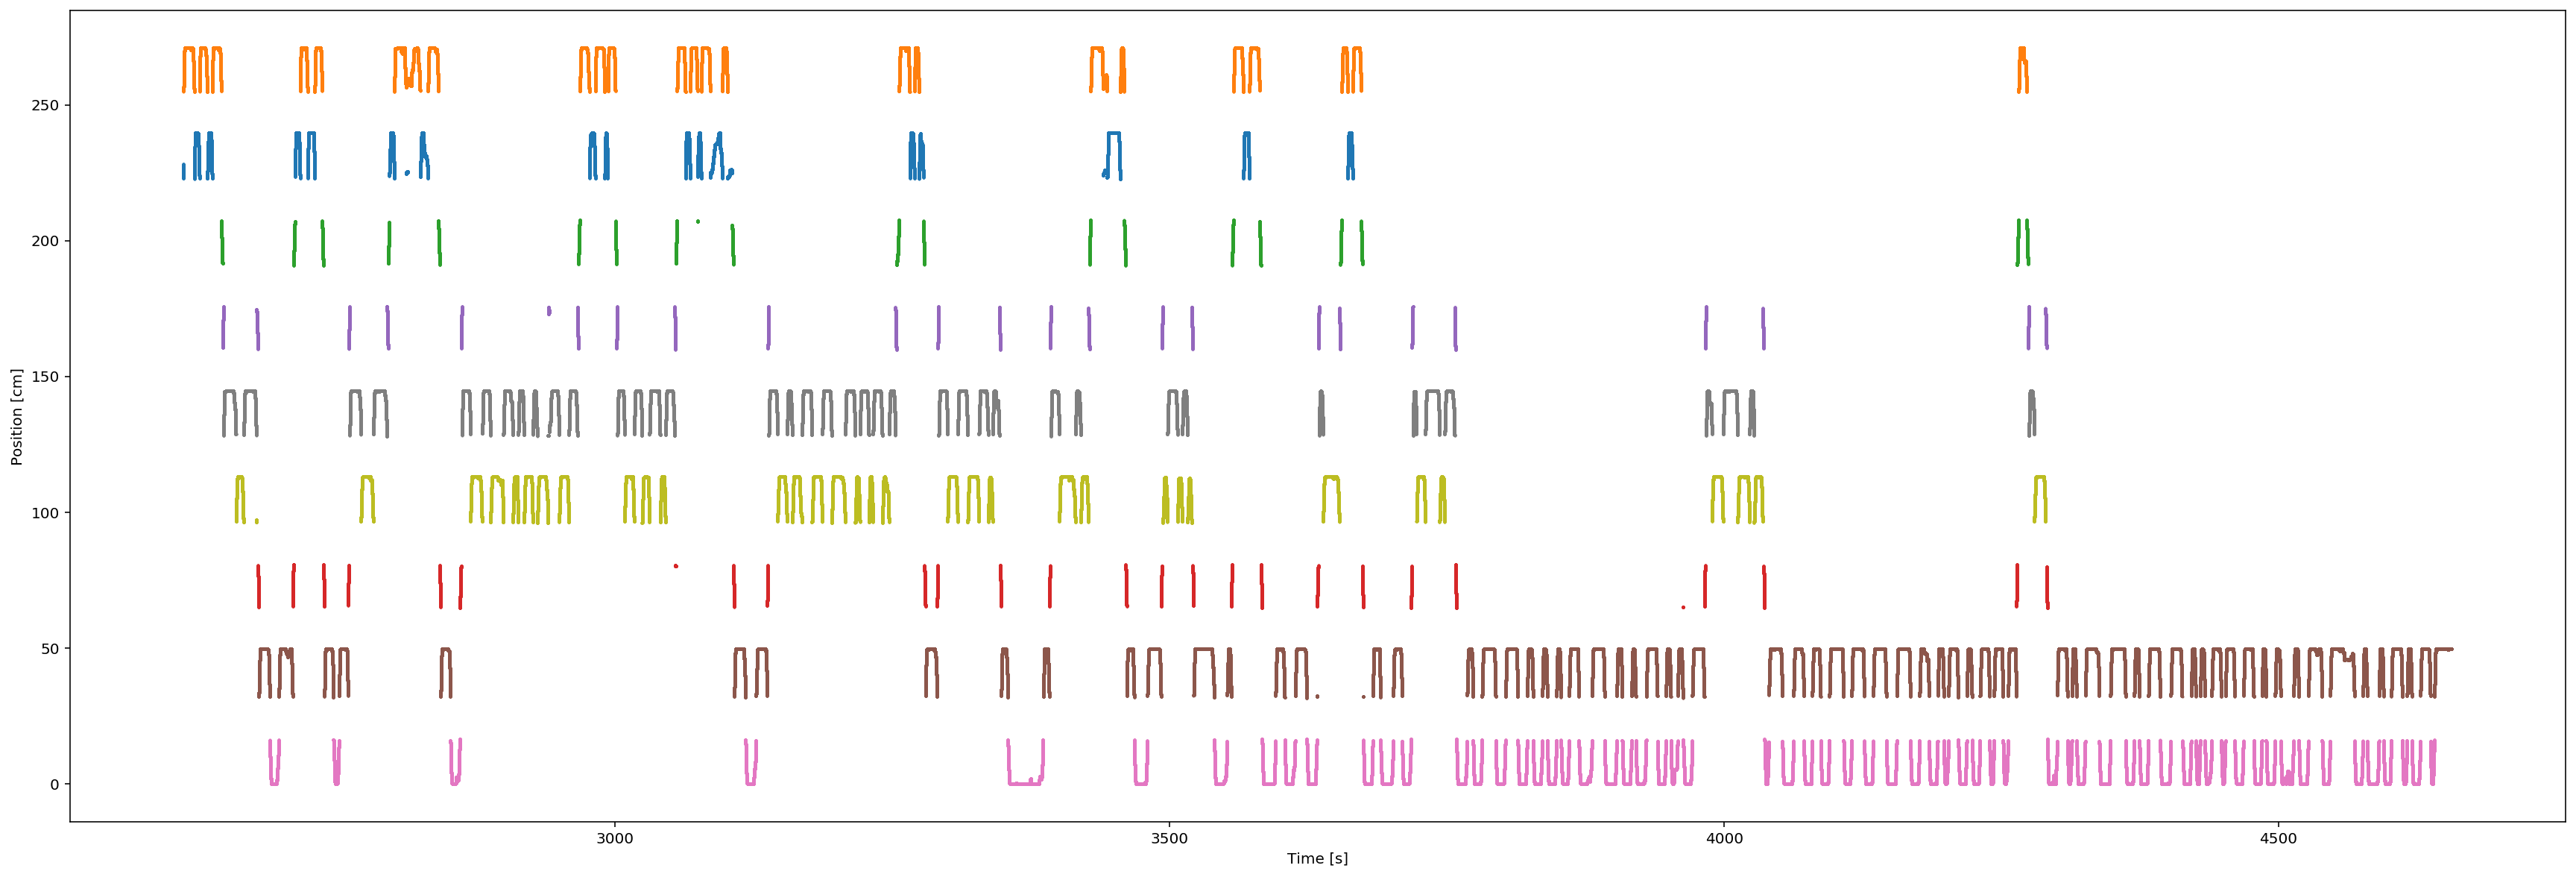

In [6]:
fig, ax = plt.subplots(figsize=(30, 10))

for edge_label, df in data['position_info'].groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_position, s=1)
    
ax.set_ylabel('Position [cm]')
ax.set_xlabel('Time [s]');

In [7]:
data['multiunits']

<xarray.DataArray (time: 1022605, features: 4, tetrodes: 27)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  33.,  nan, ...,  nan, 187.,  nan],
        [ nan,  71.,  nan, ...,  nan,  -2.,  nan],
        [ nan,  19.,  nan, ...,  nan,  58.,  nan],
        [ nan,  29.,  nan, ...,  nan,  48.,  nan]],

       [[ nan,  51.,  nan, ...,  nan,  47.,  nan],
        [ nan, 624.,  nan, ...,  nan,  33.,  nan],
        [ nan,  18.,  nan, ...,  nan,  62.,  nan],
        [ nan,  95.,  nan, ...,  nan,  48.,  nan]],

       ...,

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * time      (time) timedelta64[ns] 00:43:30.546587 ... 01:17:35.754587
  * features  (features) <U13 'channel_1_max' ... 'channel_4_max'
Dimensions without coordinates: tetrodes

In [8]:
data['multiunits'].isel(tetrodes=0).dropna('time')

<xarray.DataArray (time: 146536, features: 4)>
array([[ 47.,  53.,  27.,  63.],
       [140.,  -4.,  37.,  27.],
       [109.,  -4.,  33.,  30.],
       ...,
       [ 60.,  52.,  31.,  34.],
       [ 80.,  63.,  59.,  72.],
       [ 49.,  31.,  21.,  66.]])
Coordinates:
  * time      (time) timedelta64[ns] 00:43:30.564587 ... 01:17:35.748587
  * features  (features) <U13 'channel_1_max' ... 'channel_4_max'

Next we import the decoder and set the parameters for decoding. We use the help (?) to tell use what the parameters are.

In [9]:
from replay_trajectory_classification import ClusterlessDecoder

ClusterlessDecoder?

Init signature:
ClusterlessDecoder(
    place_bin_size=2.0,
    replay_speed=40,
    movement_var=0.05,
    position_range=None,
    model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
    model_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
    occupancy_model=None,
    occupancy_kwargs=None,
    transition_type='random_walk',
    initial_conditions_type='uniform_on_track',
    infer_track_interior=True,
)
Docstring:     
Attributes
----------
place_bin_size : float, optional
    Approximate size of the position bins.
replay_speed : int, optional
    How many times faster the replay movement is than normal movement.
movement_var : float, optional
    How far the animal is can move in one time bin during normal
    movement.
position_range : sequence, optional
    A sequence of `n_position_dims`, each an optional (lower, upper)
    tuple giving the outer bin edges for position.
    An entry of None in the sequence results in the minimum and maximum
    values 

We then set the parameters. In this case, we are using a random walk with a variance of 6.0 cm, which has a standard deviation of sqrt(6.0) ~= 2.45 cm. This means that according to the state transition there's a 68% chance that the next position is within 2.45 cm of the current posterior in one time step (2 ms).

In [10]:
decoder = ClusterlessDecoder(
    place_bin_size=2.5,
    replay_speed=1,
    movement_var=6,
    transition_type='random_walk')

We then fit the decoder on the animal's actual position when running (speeds > 4 cm/s), relating the rat's position to the multiunit marks. We can see the settings we used (boo

In [11]:
decoder.fit?

Signature:
decoder.fit(
    position,
    multiunits,
    is_training=None,
    is_track_interior=None,
    track_graph=None,
    center_well_id=None,
    edge_order=None,
    edge_spacing=15,
)
Docstring:
Parameters
----------
position : array_like, shape (n_time, n_position_dims)
multiunits : array_like, shape (n_time, n_marks, n_electrodes)
is_training : None or array_like, shape (n_time,)
is_track_interior : None or ndarray, shape (n_x_bins, n_y_bins)
track_graph : networkx.Graph
center_well_id : object
edge_order : array_like
edge_spacing : None, float or array_like

Returns
-------
self
File:      ~/miniconda3/envs/cameron_alison_theta_decoding/lib/python3.6/site-packages/replay_trajectory_classification/decoder.py
Type:      method


In [12]:
from src.parameters import EDGE_ORDER, EDGE_SPACING
from src.load_data import make_track_graph

track_graph, center_well_id = make_track_graph()

decoder.fit(
    position=data['position_info'].linear_position,
    multiunits=data['multiunits'],
    is_training=data['position_info'].speed > 4,
    track_graph=track_graph,
    center_well_id=center_well_id,
    edge_order=EDGE_ORDER,
    edge_spacing=EDGE_SPACING,
)

INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...


ClusterlessDecoder(infer_track_interior=True,
                   initial_conditions_type='uniform_on_track',
                   model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   model_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
                   movement_var=6,
                   occupancy_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
                   occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   place_bin_size=2.5, position_range=None, replay_speed=1,
                   transition_type='random_walk')

## Decoding

We can then use the `predict` function to decode a piece of data. In this case we are decoding the first 10 timepoints of the dataset. This function returns an `xarray` object.

In [17]:
results = decoder.predict(data['multiunits'].isel(time=slice(1050, 1150)))
results

<xarray.Dataset>
Dimensions:            (position: 72, time: 100)
Coordinates:
  * time               (time) int64 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * position           (position) float64 1.191 3.573 5.955 ... 267.6 269.9
Data variables:
    likelihood         (time, position) float64 0.5198 0.51 ... 0.6342 0.6776
    causal_posterior   (time, position) float64 0.029 0.02845 ... 0.2991 0.4104
    acausal_posterior  (time, position) float64 1.005e-13 3.735e-13 ... 0.4104

We can then plot the acausal decode (using both past and future data) easily with xarray.

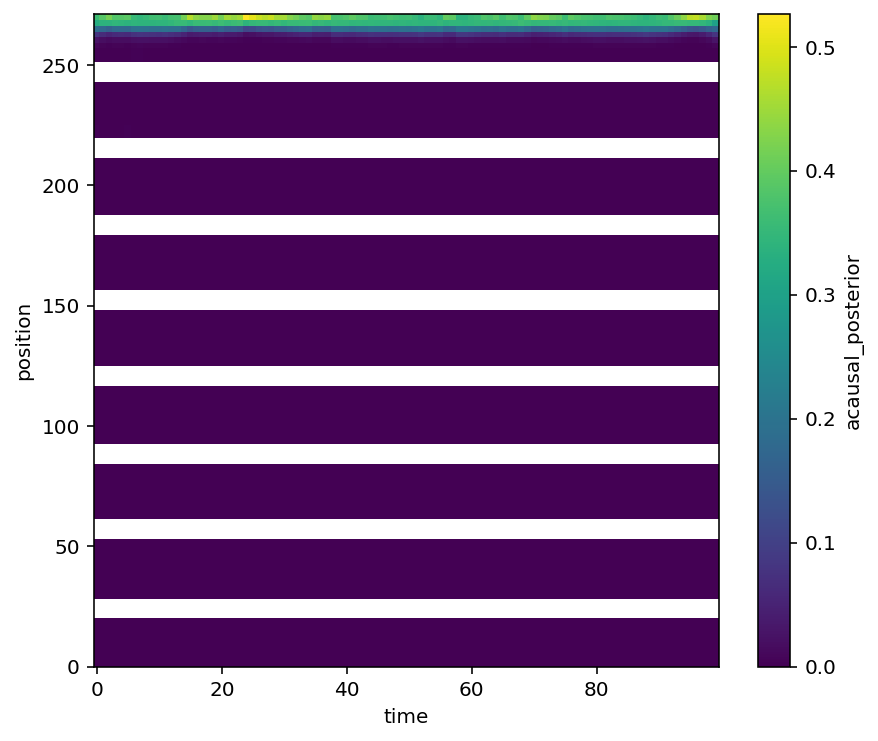

In [18]:
fig, ax = plt.subplots(figsize=(7, 6))
results.acausal_posterior.plot(x='time', y='position', ax=ax)